# Airbnb Rate Analysis 

-To calculate the yearly average annual rate for each neigbourhood for each year, SD for each neigbourhood for each year, get the gragh to see the price trend, maps for the sf (later)

### Importing Dependencies

In [62]:
# Dependencies
%matplotlib inline
import pandas as pd
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

### Creating Dataframe from the csv file

In [63]:
#Create a dataframe from the csv file
airbnb_df = pd.read_csv("../Data/Airbnb_listings.csv")
airbnb_df.head()

,Unnamed: 0,date,neighbourhood,property type,daily rate,annual rate (USD)
0,0,2016-10,Seacliff,House,$105.00,38325.0
1,1,2016-10,Seacliff,House,$300.00,109500.0
2,2,2016-10,Seacliff,Apartment,$175.00,63875.0
3,3,2016-10,Seacliff,House,$90.00,32850.0
4,4,2016-10,Seacliff,Condominium,$400.00,146000.0


### Cleaning Data and Creating new DataFrame

In [64]:
# Check the columns names 
airbnb_df.columns

Index(['Unnamed: 0', 'date', 'neighbourhood', 'property type', 'daily rate',
       'annual rate (USD)'],
      dtype='object')

In [65]:
# Remove the Unnamed:0 column
airbnb_rate = airbnb_df.drop(['Unnamed: 0'], axis=1)
airbnb_rate.head()

,date,neighbourhood,property type,daily rate,annual rate (USD)
0,2016-10,Seacliff,House,$105.00,38325.0
1,2016-10,Seacliff,House,$300.00,109500.0
2,2016-10,Seacliff,Apartment,$175.00,63875.0
3,2016-10,Seacliff,House,$90.00,32850.0
4,2016-10,Seacliff,Condominium,$400.00,146000.0


In [66]:
# Rename the dataframe 
data = airbnb_rate

In [67]:
# Remove the month from the date by using the list comprehension
#for each in data['date']:
  #  return each[:4]
data['date'] = [e[:4] for e in data['date']]
data['date'].head()

0    2016
1    2016
2    2016
3    2016
4    2016
Name: date, dtype: object

In [68]:
# Set the date to year 2015 data 
# Calculate the Annual Average Rate of year 2015 
# Create a new DataFrame df_2015 under neighbourhood and Annual Average Rate 
# Merge df_2015 to data_2015
data_year_2015 = data[data["date"] == '2015']
avg_2015 = data_year_2015.groupby(['neighbourhood'])["annual rate (USD)"].mean()

df_2015 = pd.DataFrame({
    'neighbourhood':avg_2015.index,
    'Annual Average Rate':avg_2015.values
})

merged_2015 = pd.merge(data_year_2015, df_2015, on="neighbourhood")
merged_2015.head()

,date,neighbourhood,property type,daily rate,annual rate (USD),Annual Average Rate
0,2015,Seacliff,Apartment,$350.00,127750.0,90754.150943
1,2015,Seacliff,House,$300.00,109500.0,90754.150943
2,2015,Seacliff,House,$119.00,43435.0,90754.150943
3,2015,Seacliff,Apartment,$79.00,28835.0,90754.150943
4,2015,Seacliff,Apartment,$695.00,253675.0,90754.150943


In [69]:
# Set the date to year 2016 data 
# Calculate the Annual Average Rate of year 2016 
# Create a new DataFrame df_2016 under neighbourhood and Annual Average Rate 
# Merge df_2016 to data_year_2016
data_year_2016 = data[data["date"] == '2016']
avg_2016 = data_year_2016.groupby(['neighbourhood'])["annual rate (USD)"].mean()

df_2016 = pd.DataFrame({
    'neighbourhood':avg_2016.index, 
    'Annual Average Rate':avg_2016.values   
})

merged_2016 = pd.merge(data_year_2016, df_2016, on= "neighbourhood")
merged_2016.head()

,date,neighbourhood,property type,daily rate,annual rate (USD),Annual Average Rate
0,2016,Seacliff,House,$105.00,38325.0,99225.45977
1,2016,Seacliff,House,$300.00,109500.0,99225.45977
2,2016,Seacliff,Apartment,$175.00,63875.0,99225.45977
3,2016,Seacliff,House,$90.00,32850.0,99225.45977
4,2016,Seacliff,Condominium,$400.00,146000.0,99225.45977


In [70]:
# Set the date to year 2017 data 
# Calculate the Annual Average Rate of year 2017 
# Create a new DataFrame df_2015 under neighbourhood and Annual Average Rate 
# Merge df_2017 to data_year_2017
data_year_2017 = data[data["date"] == '2017']
avg_2017 = data_year_2017.groupby(['neighbourhood'])["annual rate (USD)"].mean()

df_2017 = pd.DataFrame({
    'neighbourhood':avg_2017.index, 
    'Annual Average Rate':avg_2017.values   
})

merged_2017 = pd.merge(data_year_2017, df_2017, on= "neighbourhood")
merged_2017.head()

,date,neighbourhood,property type,daily rate,annual rate (USD),Annual Average Rate
0,2017,Seacliff,House,$895.00,326675.0,146973.333333
1,2017,Seacliff,House,$150.00,54750.0,146973.333333
2,2017,Seacliff,Apartment,$295.00,107675.0,146973.333333
3,2017,Seacliff,House,$98.00,35770.0,146973.333333
4,2017,Seacliff,House,$85.00,31025.0,146973.333333


In [75]:
df_2017.head()

,neighbourhood,Annual Average Rate
0,Bayview,45354.454349
1,Bernal Heights,72724.984682
2,Castro/Upper Market,90733.812922
3,Chinatown,99129.416191
4,Crocker Amazon,35399.721074


In [78]:
df_2017.set_index('neighbourhood',inplace = True)

In [79]:
df_2017

,Annual Average Rate
neighbourhood,
Bayview,45354.454349
Bernal Heights,72724.984682
Castro/Upper Market,90733.812922
Chinatown,99129.416191
Crocker Amazon,35399.721074
Diamond Heights,71024.858156
Downtown/Civic Center,76940.307030
Excelsior,50886.612752
Financial District,112270.598697


In [36]:
#Merge three years dataFrames into one by using concat 
fulldata = pd.concat([merged_2015,merged_2016,merged_2017])
fulldata.head()

,date,neighbourhood,property type,daily rate,annual rate (USD),Annual Average Rate
0,2015,Seacliff,Apartment,$350.00,127750.0,90754.150943
1,2015,Seacliff,House,$300.00,109500.0,90754.150943
2,2015,Seacliff,House,$119.00,43435.0,90754.150943
3,2015,Seacliff,Apartment,$79.00,28835.0,90754.150943
4,2015,Seacliff,Apartment,$695.00,253675.0,90754.150943


In [37]:
fulldata.to_csv('airbnbdataanalysis.csv')

In [38]:
avg_2015.head()


neighbourhood
Bayview                46374.210526
Bernal Heights         68704.419910
Castro/Upper Market    84268.127229
Chinatown              91821.365385
Crocker Amazon         47207.836538
Name: annual rate (USD), dtype: float64

In [39]:
avg_2016.head()


neighbourhood
Bayview                 58118.039049
Bernal Heights          77447.149051
Castro/Upper Market     97370.541370
Chinatown              108057.512626
Crocker Amazon          43735.507519
Name: annual rate (USD), dtype: float64

In [40]:
avg_2017.head()

neighbourhood
Bayview                45354.454349
Bernal Heights         72724.984682
Castro/Upper Market    90733.812922
Chinatown              99129.416191
Crocker Amazon         35399.721074
Name: annual rate (USD), dtype: float64

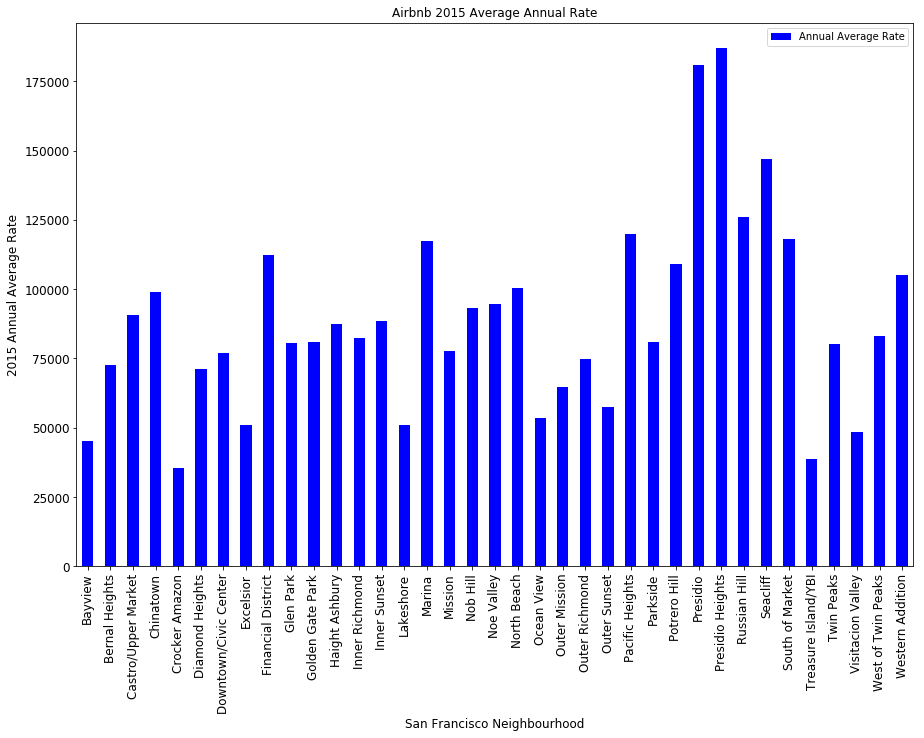

In [80]:
b = df_2017.plot(kind = 'bar', title = "Airbnb 2015 Average Annual Rate", figsize = (15,10), legend = True, color = 'blue', fontsize = 12)
b.set_xlabel("San Francisco Neighbourhood", fontsize = 12)
b.set_ylabel("2015 Annual Average Rate", fontsize = 12)
plt.show()